In [1]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

<ErrorbarContainer object of 3 artists>

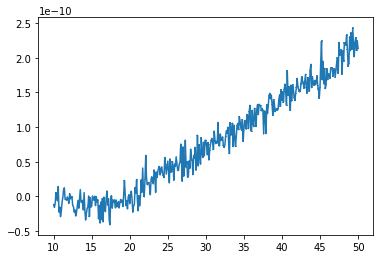

In [3]:
with open('Data/stickstoff.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T


data = np.zeros((2,len(dataex[3])))

data[0] = dataex[3]
data[1] = dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.005
data = np.vstack([data,err])

plt.errorbar(data[0],data[1],yerr=data[2])

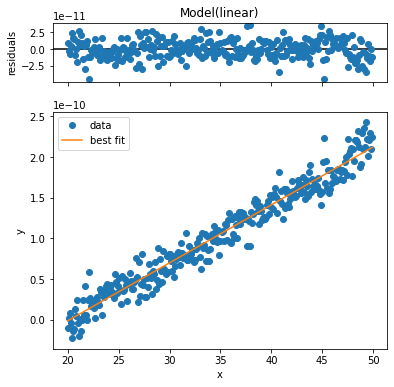

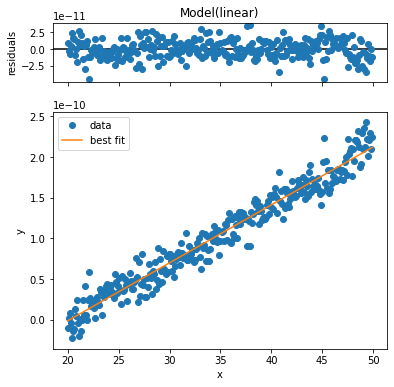

In [4]:
von = pos(20)
bis = pos(50)

model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=data[1,von:bis],x=data[0,von:bis])
out_lin =  model_lin.fit(data[1,von:bis],x=data[0,von:bis],params=pars_lin,nan_policy='propagate')
out_lin.plot()
print(out_lin.fit_report())

<ErrorbarContainer object of 3 artists>

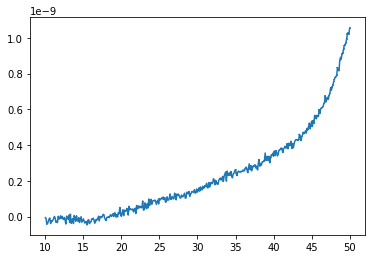

In [5]:
with open('Data/stickstoff2.csv', mode='r') as tf:
        data2ex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T


data2 = np.zeros((2,len(data2ex[3])))

data2[0] = data2ex[3]
data2[1] = data2ex[4]

err = np.zeros(len(data2[1]))
for i in range(len(err)):
    err[i] = (data2[1,i])*0.005
data2 = np.vstack([data2,err])

plt.errorbar(data2[0],data2[1],yerr=data2[2])

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 200
    # variables        = 2
    chi-square         = 5.2640e-20
    reduced chi-square = 2.6586e-22
    Akaike info crit   = -9933.82666
    Bayesian info crit = -9927.23002
[[Variables]]
    slope:      1.5593e-11 +/- 1.9970e-13 (1.28%) (init = 1.55927e-11)
    intercept: -3.0400e-10 +/- 6.0911e-12 (2.00%) (init = -3.039974e-10)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.982


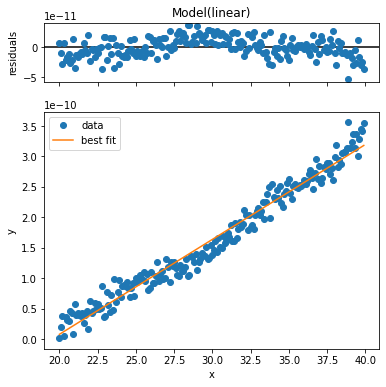

In [9]:
von = pos(20)
bis = pos(40)

model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=data2[1,von:bis],x=data2[0,von:bis])
out_lin =  model_lin.fit(data2[1,von:bis],x=data2[0,von:bis],params=pars_lin,nan_policy='propagate')
out_lin.plot()
print(out_lin.fit_report())